In [1]:
import pandas as pd 
import numpy as np

train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')


In [2]:
train_df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [3]:
test_df.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,4,22,4,29,5279,4,P48,9,4,2,33,2,3
1,2008,5,19,1,29,10059,1,A15,14,5,2,33,2,1
2,2008,4,11,10,29,2919,4,P23,6,2,2,28,2,2
3,2008,4,28,3,27,6304,2,B24,11,2,1,57,1,2
4,2008,5,26,1,29,11266,1,A2,3,1,1,43,2,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33095 entries, 0 to 33094
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  33095 non-null  int64 
 1   month                 33095 non-null  int64 
 2   day                   33095 non-null  int64 
 3   order                 33095 non-null  int64 
 4   country               33095 non-null  int64 
 5   session_id            33095 non-null  int64 
 6   page1_main_category   33095 non-null  int64 
 7   page2_clothing_model  33095 non-null  object
 8   colour                33095 non-null  int64 
 9   location              33095 non-null  int64 
 10  model_photography     33095 non-null  int64 
 11  price                 33095 non-null  int64 
 12  price_2               33095 non-null  int64 
 13  page                  33095 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 3.5+ MB


In [6]:
country_to_continent = {
    1: 'Oceania', 2: 'Europe', 3: 'Europe', 4: 'North America', 5: 'North America',
    6: 'Oceania', 7: 'Europe', 8: 'Europe', 9: 'Europe', 10: 'Europe',
    11: 'Europe', 12: 'Unknown', 13: 'Europe', 14: 'Europe', 15: 'Europe',
    16: 'Europe', 17: 'Europe', 18: 'Europe', 19: 'Europe', 20: 'Asia',
    21: 'Europe', 22: 'Europe', 23: 'Europe', 24: 'Europe', 25: 'Europe',
    26: 'North America', 27: 'Europe', 28: 'Europe', 29: 'Europe', 30: 'Europe',
    31: 'Europe', 32: 'Europe', 33: 'Europe', 34: 'Europe', 35: 'Europe',
    36: 'Europe', 37: 'Europe', 38: 'Europe', 39: 'Europe', 40: 'Asia',
    41: 'Europe', 42: 'North America', 43: 'Unknown', 44: 'Unknown',
    45: 'Unknown', 46: 'Unknown', 47: 'Unknown'
}


def preprocess_data(df, country_to_continent):
    # Map Country to Continent
    df['continent'] = df['country'].map(country_to_continent)
    
    # Drop rows with Unknown continent
    df = df[df['continent'] != 'Unknown']
    
    # Drop original 'country' column
    df = df.drop(columns=['country'])
    
    # Split 'page2_clothing_model' into type and number
    df['clothing_model_number'] = df['page2_clothing_model'].str[1:].astype(int)  # Extract numeric part
    
    df = df.drop(columns = ['page2_clothing_model'])
    
    # Encoding PAGE1_MAIN_CATEGORY
    df['page1_main_category'] = df['page1_main_category'].map({
        1: 'trousers', 2: 'skirts', 3: 'blouses', 4: 'sale'
    })
    
    # Encoding price_2
    df['price_2'] = df['price_2'].map({
        1:1 , 2:0
    })
   
    
   # Return preprocessed data
    return df

In [7]:
train_df = preprocess_data(train_df , country_to_continent)
test_df = preprocess_data(test_df , country_to_continent)


In [8]:
# Session-based metrics function
def compute_session_metrics(df):
    # Session Length: Total number of clicks per session
    session_metrics = df.groupby('session_id')['order'].max().reset_index()
    session_metrics.rename(columns={'order': 'session_length'}, inplace=True)

    # Clicks per Product Category
    category_clicks = df.groupby(['session_id', 'page1_main_category']).size().unstack(fill_value=0)
    category_clicks.columns = [f"clicks_{col}" for col in category_clicks.columns]
    category_clicks.reset_index(inplace=True)

    # Browsing Path
    browsing_path = df.groupby('session_id')['page1_main_category'].apply(lambda x: ' → '.join(x)).reset_index()
    browsing_path.rename(columns={'page1_main_category': 'browsing_path'}, inplace=True)

    # First and Last Click
    first_click = df.groupby('session_id')['page1_main_category'].first().reset_index()
    first_click.rename(columns={'page1_main_category': 'first_click'}, inplace=True)

    last_click = df.groupby('session_id')['page1_main_category'].last().reset_index()
    last_click.rename(columns={'page1_main_category': 'last_click'}, inplace=True)

    # Merge all metrics
    session_data = session_metrics.merge(category_clicks, on='session_id', how='left')
    session_data = session_data.merge(browsing_path, on='session_id', how='left')
    session_data = session_data.merge(first_click, on='session_id', how='left')
    session_data = session_data.merge(last_click, on='session_id', how='left')

    return session_data



In [9]:
# Compute session metrics
train_session_metrics = compute_session_metrics(train_df)
test_session_metrics = compute_session_metrics(test_df)

# Merge session metrics back to original datasets
train_df = train_df.merge(train_session_metrics, on='session_id', how='left')
test_df = test_df.merge(test_session_metrics, on='session_id', how='left')


In [10]:
train_df.head()

,year,month,day,order,session_id,page1_main_category,colour,location,model_photography,price,...,continent,clothing_model_number,session_length,clicks_blouses,clicks_sale,clicks_skirts,clicks_trousers,browsing_path,first_click,last_click
0,2008,6,22,21,15648,blouses,13,1,2,48,...,Europe,20,107,36,2,11,35,blouses → blouses → blouses → skirts → trouser...,blouses,blouses
1,2008,5,19,6,10018,skirts,13,3,1,57,...,Europe,26,13,0,0,7,2,skirts → skirts → trousers → skirts → skirts →...,skirts,skirts
2,2008,7,15,2,19388,blouses,9,5,1,48,...,Europe,13,11,5,2,0,3,blouses → blouses → blouses → blouses → trouse...,blouses,blouses
3,2008,5,2,2,7181,skirts,2,4,1,43,...,Europe,11,8,1,0,5,0,skirts → skirts → blouses → skirts → skirts → ...,skirts,skirts
4,2008,6,9,16,13493,skirts,9,5,1,57,...,Europe,31,17,1,0,14,0,skirts → skirts → blouses → skirts → skirts → ...,skirts,skirts


In [11]:
train_df.shape

(129061, 22)

In [12]:
test_df.shape

(32252, 22)

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32252 entries, 0 to 32251
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   32252 non-null  int64 
 1   month                  32252 non-null  int64 
 2   day                    32252 non-null  int64 
 3   order                  32252 non-null  int64 
 4   session_id             32252 non-null  int64 
 5   page1_main_category    32252 non-null  object
 6   colour                 32252 non-null  int64 
 7   location               32252 non-null  int64 
 8   model_photography      32252 non-null  int64 
 9   price                  32252 non-null  int64 
 10  price_2                32252 non-null  int64 
 11  page                   32252 non-null  int64 
 12  continent              32252 non-null  object
 13  clothing_model_number  32252 non-null  int64 
 14  session_length         32252 non-null  int64 
 15  clicks_blouses     

In [14]:
# One-Hot Encoding for categorical features
categorical_features = ['page1_main_category', 'continent']

def encode_data(df):
    return pd.get_dummies(df, columns=categorical_features, drop_first=True)

train_df = encode_data(train_df)
test_df = encode_data(test_df)

# Align train and test data to ensure same feature columns
train_df , test_df = train_df.align(test_df , join = 'left', axis=1 , fill_value= 0)

In [15]:
train_df.head()

,year,month,day,order,session_id,colour,location,model_photography,price,price_2,...,clicks_trousers,browsing_path,first_click,last_click,page1_main_category_sale,page1_main_category_skirts,page1_main_category_trousers,continent_Europe,continent_North America,continent_Oceania
0,2008,6,22,21,15648,13,1,2,48,1,...,35,blouses → blouses → blouses → skirts → trouser...,blouses,blouses,False,False,False,True,False,False
1,2008,5,19,6,10018,13,3,1,57,1,...,2,skirts → skirts → trousers → skirts → skirts →...,skirts,skirts,False,True,False,True,False,False
2,2008,7,15,2,19388,9,5,1,48,1,...,3,blouses → blouses → blouses → blouses → trouse...,blouses,blouses,False,False,False,True,False,False
3,2008,5,2,2,7181,2,4,1,43,0,...,0,skirts → skirts → blouses → skirts → skirts → ...,skirts,skirts,False,True,False,True,False,False
4,2008,6,9,16,13493,9,5,1,57,1,...,0,skirts → skirts → blouses → skirts → skirts → ...,skirts,skirts,False,True,False,True,False,False


In [16]:
test_df.head()

,year,month,day,order,session_id,colour,location,model_photography,price,price_2,...,clicks_trousers,browsing_path,first_click,last_click,page1_main_category_sale,page1_main_category_skirts,page1_main_category_trousers,continent_Europe,continent_North America,continent_Oceania
0,2008,4,22,4,5279,9,4,2,33,0,...,0,sale → sale,sale,sale,True,False,False,True,False,False
1,2008,5,19,1,10059,14,5,2,33,0,...,2,trousers → trousers,trousers,trousers,False,False,True,True,False,False
2,2008,4,11,10,2919,6,2,2,28,0,...,0,sale → skirts → sale → sale → skirts → sale → ...,sale,skirts,True,False,False,True,False,False
3,2008,4,28,3,6304,11,2,1,57,1,...,1,skirts → skirts → trousers,skirts,trousers,False,True,False,True,False,False
4,2008,5,26,1,11266,3,1,1,43,0,...,1,trousers,trousers,trousers,False,False,True,True,False,False


In [17]:
train_df.columns

Index(['year', 'month', 'day', 'order', 'session_id', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page',
       'clothing_model_number', 'session_length', 'clicks_blouses',
       'clicks_sale', 'clicks_skirts', 'clicks_trousers', 'browsing_path',
       'first_click', 'last_click', 'page1_main_category_sale',
       'page1_main_category_skirts', 'page1_main_category_trousers',
       'continent_Europe', 'continent_North America', 'continent_Oceania'],
      dtype='object')

In [18]:
test_df.columns

Index(['year', 'month', 'day', 'order', 'session_id', 'colour', 'location',
       'model_photography', 'price', 'price_2', 'page',
       'clothing_model_number', 'session_length', 'clicks_blouses',
       'clicks_sale', 'clicks_skirts', 'clicks_trousers', 'browsing_path',
       'first_click', 'last_click', 'page1_main_category_sale',
       'page1_main_category_skirts', 'page1_main_category_trousers',
       'continent_Europe', 'continent_North America', 'continent_Oceania'],
      dtype='object')

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129061 entries, 0 to 129060
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   year                          129061 non-null  int64 
 1   month                         129061 non-null  int64 
 2   day                           129061 non-null  int64 
 3   order                         129061 non-null  int64 
 4   session_id                    129061 non-null  int64 
 5   colour                        129061 non-null  int64 
 6   location                      129061 non-null  int64 
 7   model_photography             129061 non-null  int64 
 8   price                         129061 non-null  int64 
 9   price_2                       129061 non-null  int64 
 10  page                          129061 non-null  int64 
 11  clothing_model_number         129061 non-null  int64 
 12  session_length                129061 non-null  int64 
 13 

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32252 entries, 0 to 32251
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   year                          32252 non-null  int64 
 1   month                         32252 non-null  int64 
 2   day                           32252 non-null  int64 
 3   order                         32252 non-null  int64 
 4   session_id                    32252 non-null  int64 
 5   colour                        32252 non-null  int64 
 6   location                      32252 non-null  int64 
 7   model_photography             32252 non-null  int64 
 8   price                         32252 non-null  int64 
 9   price_2                       32252 non-null  int64 
 10  page                          32252 non-null  int64 
 11  clothing_model_number         32252 non-null  int64 
 12  session_length                32252 non-null  int64 
 13  clicks_blouses  

In [21]:
# Logic for "purchased_or_not"
def determine_purchase(row):
    # If price is higher than average, less likely to purchase
    if row["price_2"] == 1:
        return 0
    # Check if significant clicks and main category engagement
    if (
        (row["page1_main_category_sale"] and row["clicks_sale"] > 1) or
        (row["page1_main_category_skirts"] and row["clicks_skirts"] > 1) or
        (row["page1_main_category_trousers"] and row["clicks_trousers"] > 1)
    ):
        return 1
    # If session length is long (e.g., > 20), assume purchase intent
    if row["session_length"] > 4:
        return  1
    # Otherwise, no purchase
    return 0




In [22]:
# Apply the logic
train_df["purchased_or_not"] = train_df.apply(determine_purchase, axis=1)
# Apply the logic
test_df["purchased_or_not"] = test_df.apply(determine_purchase, axis=1)

In [23]:
train_df.describe()

,year,month,day,order,session_id,colour,location,model_photography,price,price_2,page,clothing_model_number,session_length,clicks_blouses,clicks_sale,clicks_skirts,clicks_trousers,purchased_or_not
count,129061.0,129061.000000,129061.000000,129061.000000,129061.000000,129061.000000,129061.000000,129061.000000,129061.000000,129061.000000,129061.000000,129061.000000,129061.000000,129061.000000,129061.000000,129061.000000,129061.000000,129061.000000
mean,2008.0,5.580307,14.495401,9.889378,12022.164674,6.233378,3.267672,1.260722,43.760199,0.511440,1.716801,21.666390,18.563338,3.844391,4.107407,2.944344,4.293954,0.446595
std,0.0,1.328865,8.826667,13.567609,7016.944666,4.242391,1.714956,0.439030,12.531852,0.499871,0.985888,18.035394,21.537054,6.947899,7.903300,4.606848,6.468392,0.497142
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,4.000000,7.000000,2.000000,5865.000000,3.000000,2.000000,1.000000,33.000000,0.000000,1.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,5.000000,14.000000,6.000000,11895.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000,16.000000,12.000000,2.000000,1.000000,1.000000,2.000000,0.000000
75%,2008.0,7.000000,22.000000,12.000000,18210.000000,9.000000,5.000000,2.000000,52.000000,1.000000,2.000000,32.000000,23.000000,5.000000,5.000000,4.000000,6.000000,1.000000
max,2008.0,8.000000,31.000000,195.000000,24026.000000,14.000000,6.000000,2.000000,82.000000,1.000000,5.000000,82.000000,195.000000,75.000000,88.000000,45.000000,53.000000,1.000000


In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129061 entries, 0 to 129060
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   year                          129061 non-null  int64 
 1   month                         129061 non-null  int64 
 2   day                           129061 non-null  int64 
 3   order                         129061 non-null  int64 
 4   session_id                    129061 non-null  int64 
 5   colour                        129061 non-null  int64 
 6   location                      129061 non-null  int64 
 7   model_photography             129061 non-null  int64 
 8   price                         129061 non-null  int64 
 9   price_2                       129061 non-null  int64 
 10  page                          129061 non-null  int64 
 11  clothing_model_number         129061 non-null  int64 
 12  session_length                129061 non-null  int64 
 13 

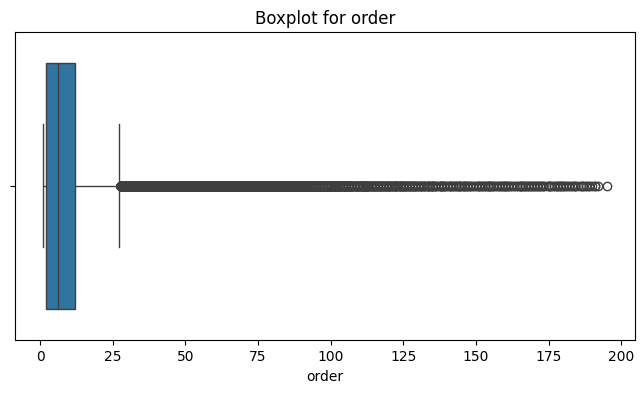

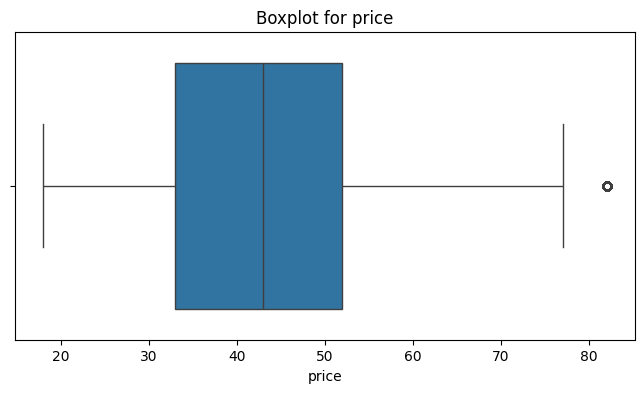

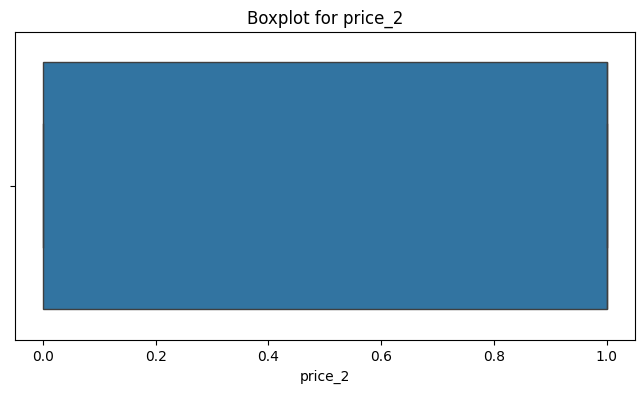

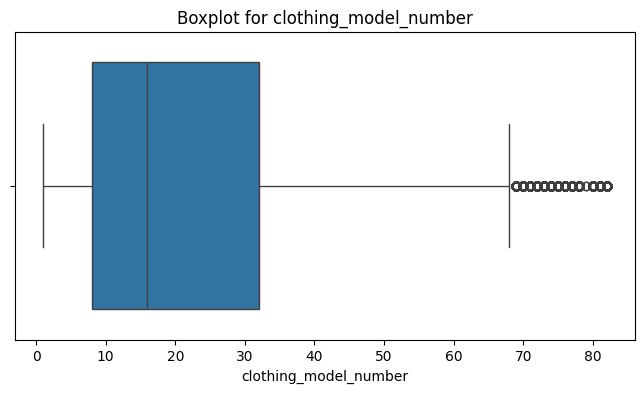

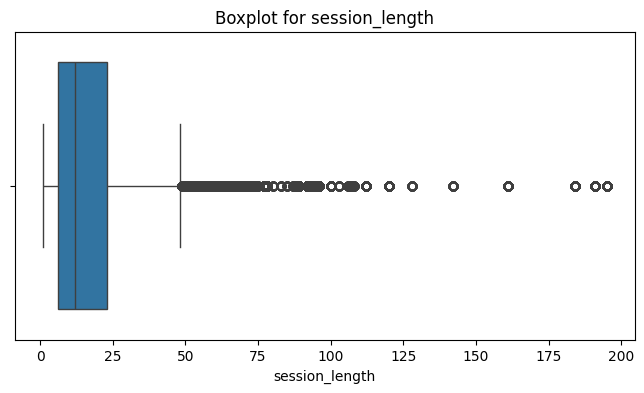

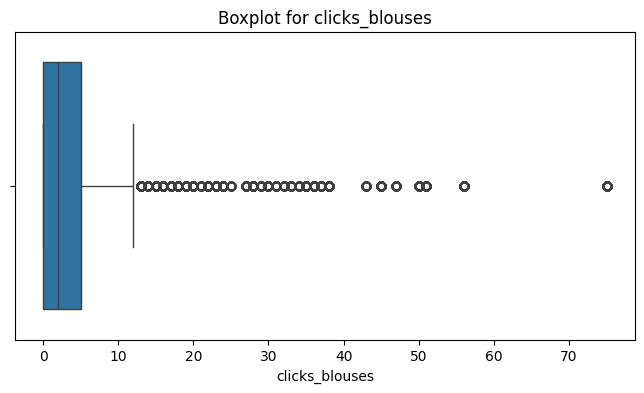

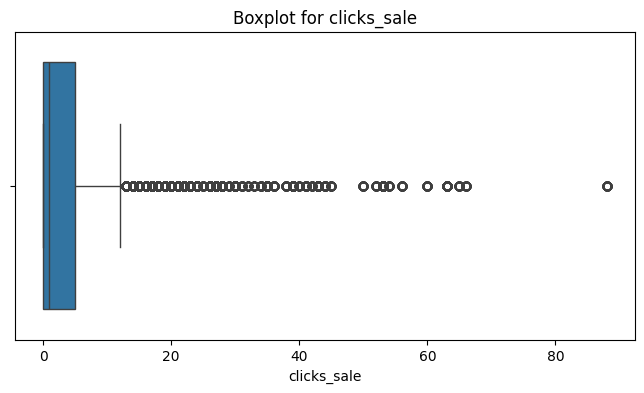

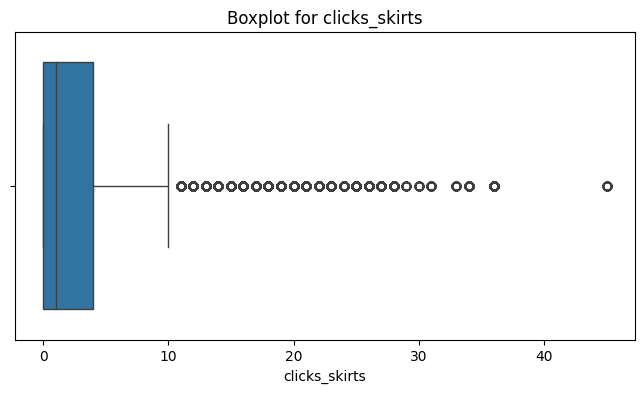

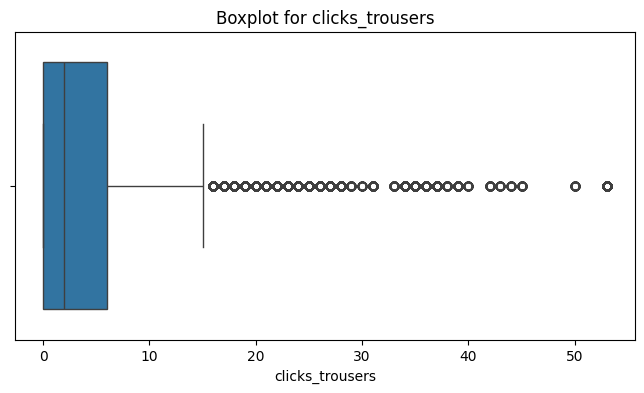

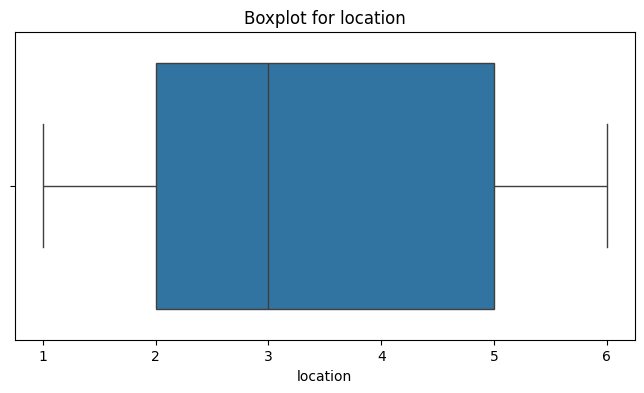

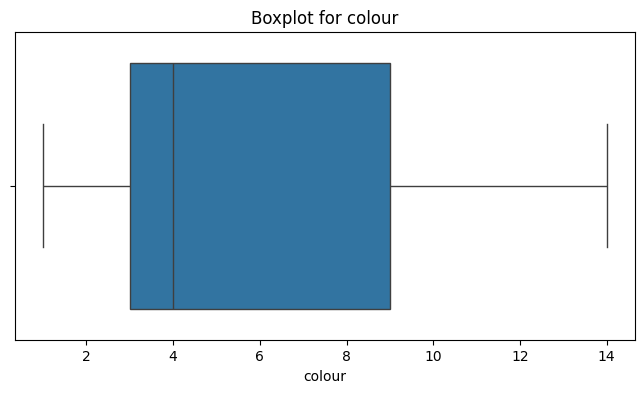

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Numeric features to check for outliers
numeric_features = [
    'order', 'price', 'price_2', 'clothing_model_number', 
    'session_length', 'clicks_blouses', 'clicks_sale', 'clicks_skirts', 
    'clicks_trousers', 'location','colour'
]

# Boxplot for a single numeric feature
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[feature])
    plt.title(f"Boxplot for {feature}")
    plt.show()

        

In [23]:
# # Detect and remove outliers function
# def detect_and_remove_outliers(df, numeric_features):
#     for feature in numeric_features:
#         if feature not in df.columns:
#             print(f"Feature '{feature}' not found in DataFrame")
#         else:
#             # Outlier detection logic (example: using IQR method)
#             Q1 = df[feature].quantile(0.25)
#             Q3 = df[feature].quantile(0.75)
#             IQR = Q3 - Q1
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR
#             df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
#     return df

# # Apply to numeric features only on the training set
# train_df = detect_and_remove_outliers(train_df, numeric_features)


In [26]:
def iqr_clipping(df, numeric_features):
    for feature in numeric_features:
        Q1 = df[feature].quantile(0.25)  # 25th percentile
        Q3 = df[feature].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1                    # Interquartile range
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Clip the data
        df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
    
    return df


# Apply IQR clipping to train_df
train_df = iqr_clipping(train_df, numeric_features)

# IMPORTANT: Use the same bounds from train_df for test_df
def iqr_clipping_test(test_df, train_df, numeric_features):
    for feature in numeric_features:
        Q1 = train_df[feature].quantile(0.25)  # 25th percentile (from train_df)
        Q3 = train_df[feature].quantile(0.75)  # 75th percentile (from train_df)
        IQR = Q3 - Q1                           # Interquartile range
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Clip the data
        test_df[feature] = test_df[feature].clip(lower=lower_bound, upper=upper_bound)
    
    return test_df

# Apply IQR clipping to test_df using bounds from train_df
test_df = iqr_clipping_test(test_df, train_df, numeric_features)


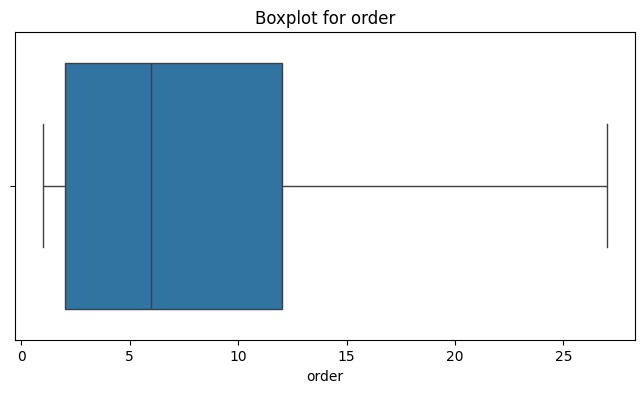

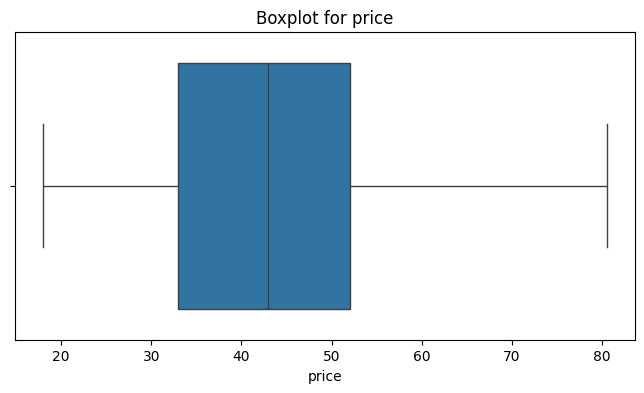

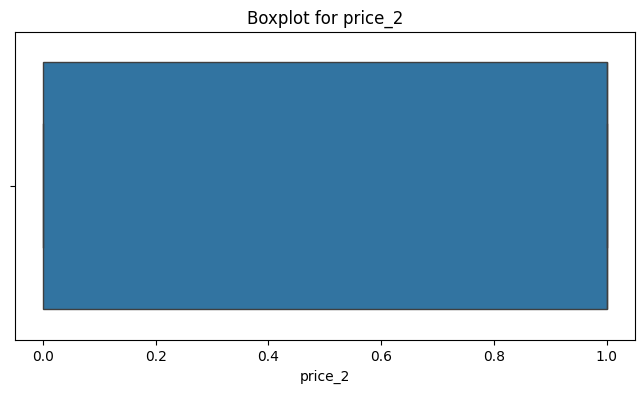

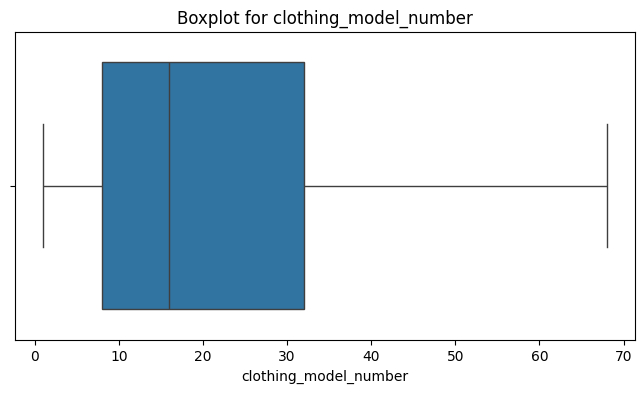

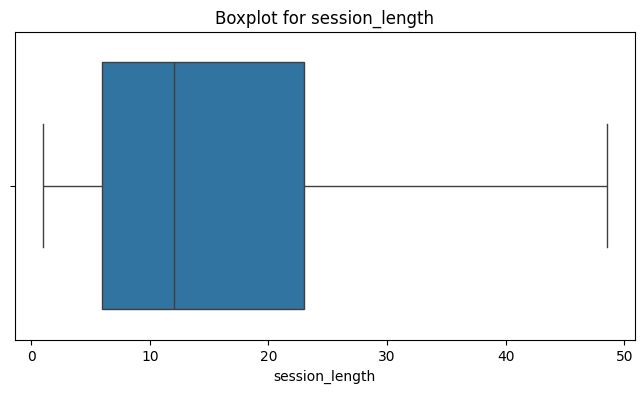

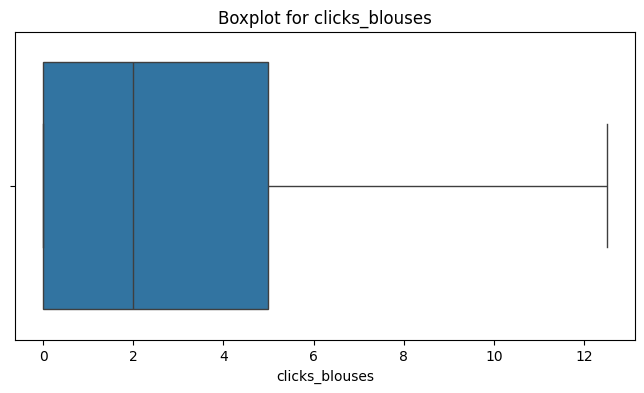

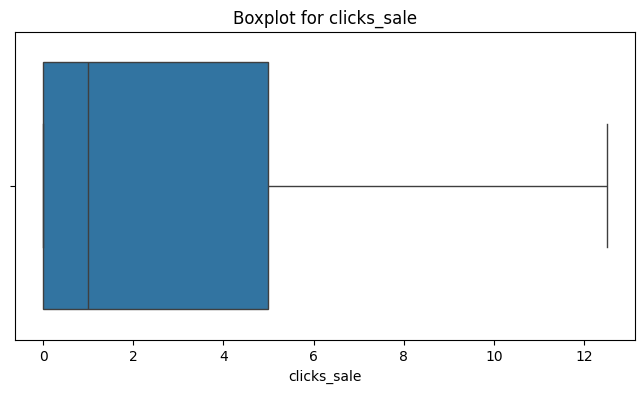

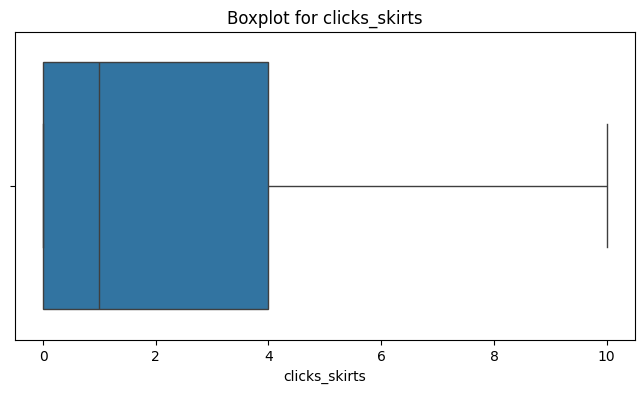

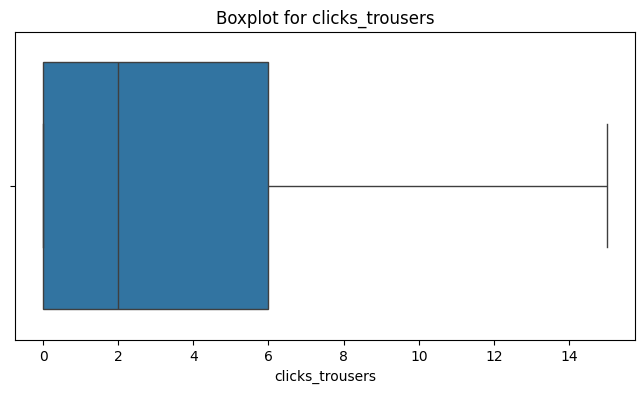

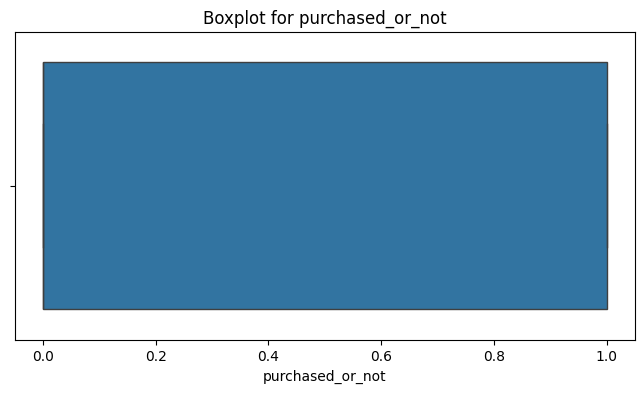

In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Numeric features to check for outliers
numeric_features = [
    'order', 'price', 'price_2', 'clothing_model_number', 
    'session_length', 'clicks_blouses', 'clicks_sale', 'clicks_skirts', 
    'clicks_trousers','purchased_or_not'
]
# Boxplot for a single numeric feature
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[feature])
    plt.title(f"Boxplot for {feature}")
    plt.show()

        

In [28]:
train_df.shape

(129061, 27)

C:\Users\Murali Krishna\AppData\Local\Temp\ipykernel_43648\2335743190.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='coolwarm')


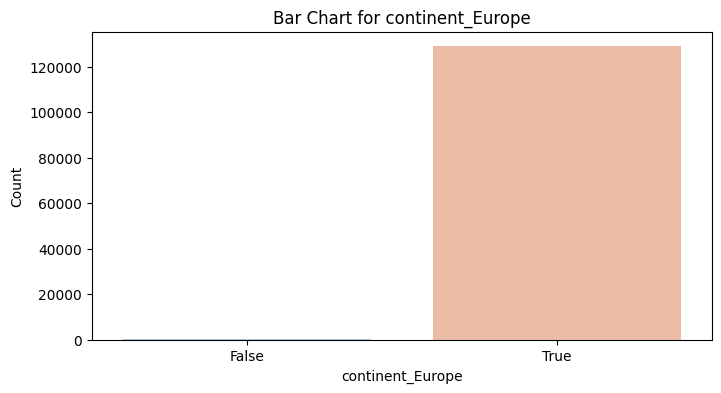

C:\Users\Murali Krishna\AppData\Local\Temp\ipykernel_43648\2335743190.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='coolwarm')


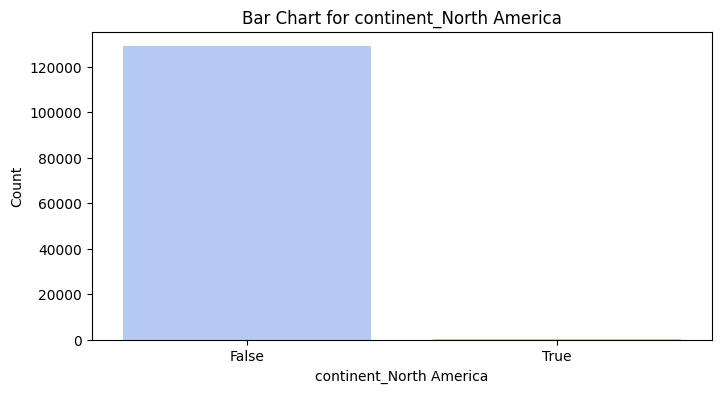

C:\Users\Murali Krishna\AppData\Local\Temp\ipykernel_43648\2335743190.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x=feature, palette='coolwarm')


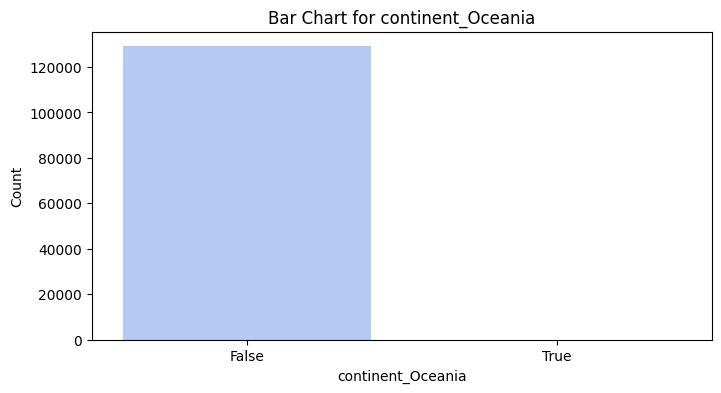

In [29]:
# Bar charts for categorical features
categorical_features = [ 'continent_Europe', 'continent_North America', 'continent_Oceania']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=feature, palette='coolwarm')
    plt.title(f"Bar Chart for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

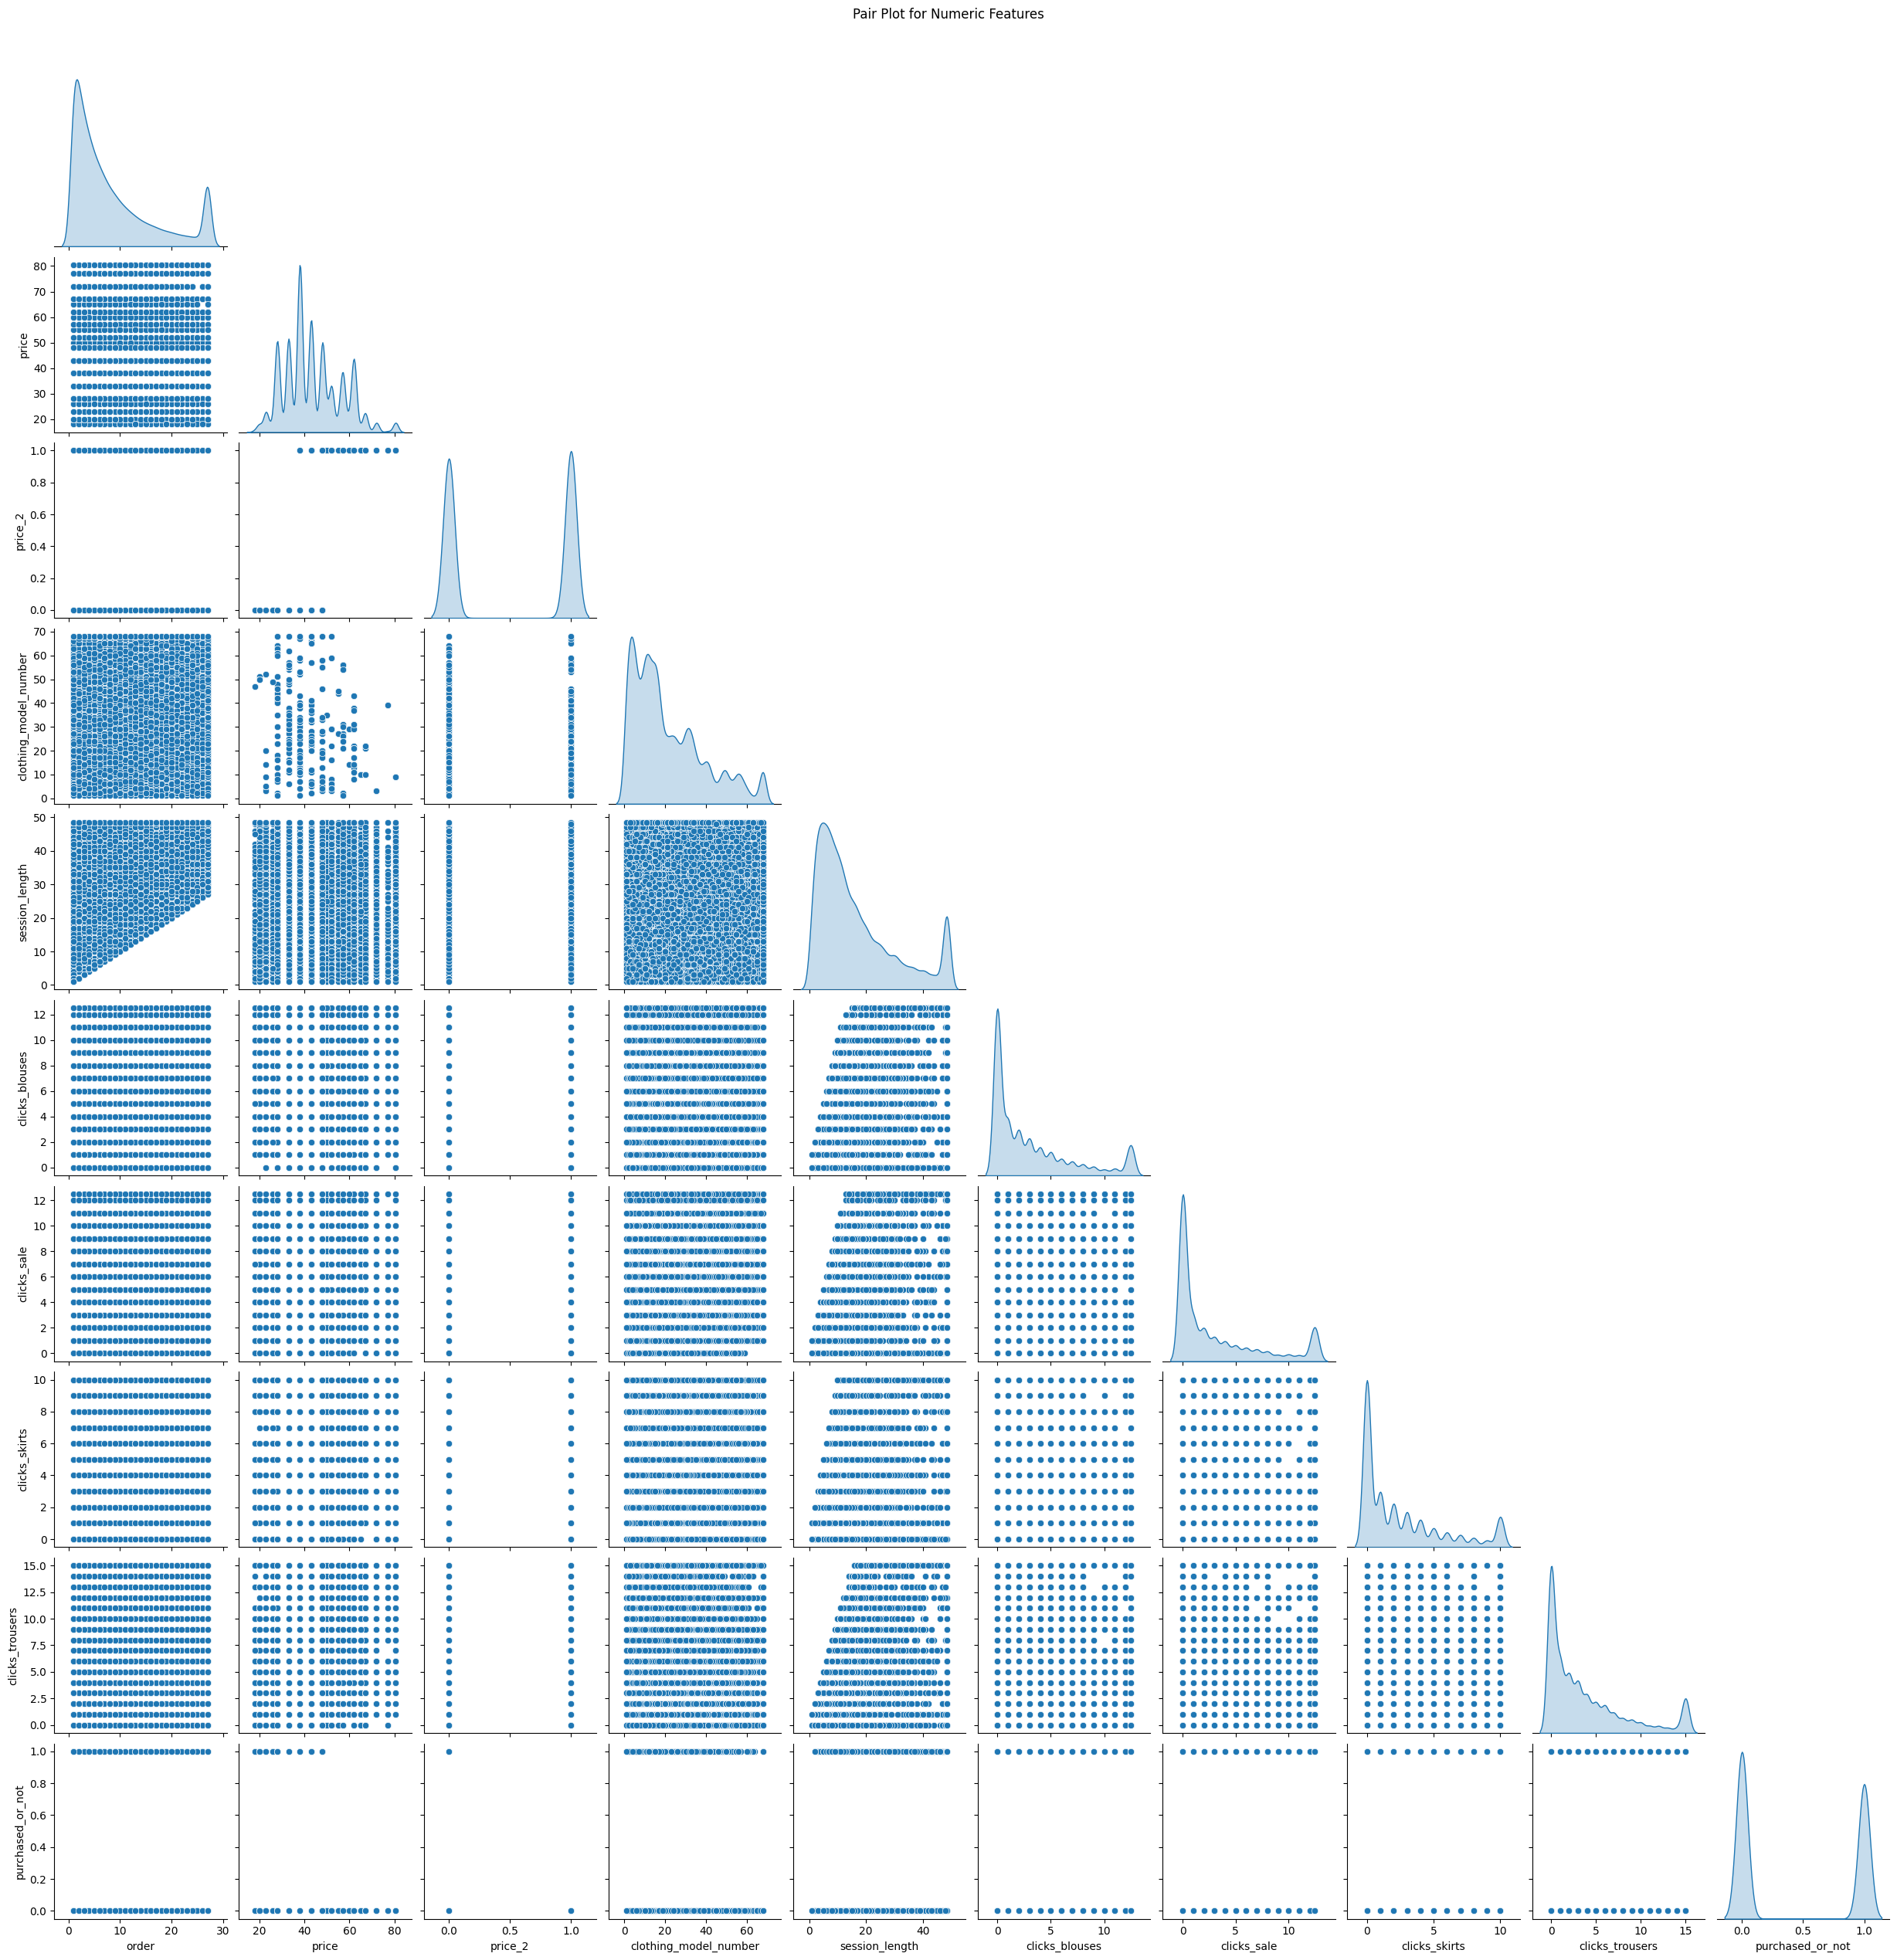

In [30]:
# Pair plots for relationships between numeric features
sns.pairplot(train_df[numeric_features], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot for Numeric Features", y=1.02)
plt.show()


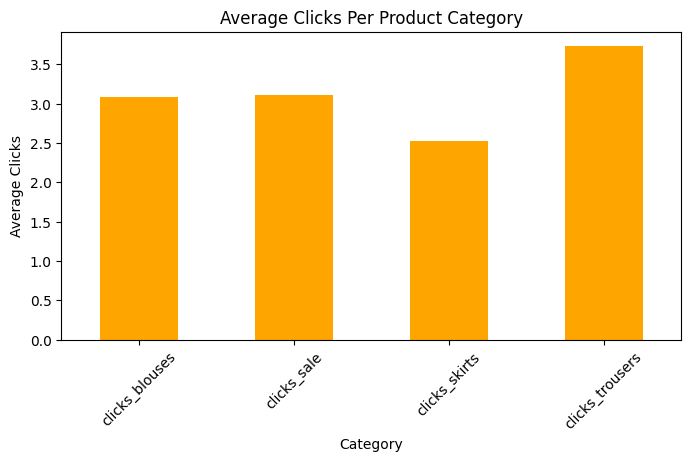

In [31]:
# Page Views Analysis: Average clicks per category
page_views = train_df[['clicks_blouses', 'clicks_sale', 'clicks_skirts', 'clicks_trousers']].mean()
page_views.plot(kind='bar', color='orange', figsize=(8, 4))
plt.title("Average Clicks Per Product Category")
plt.xlabel("Category")
plt.ylabel("Average Clicks")
plt.xticks(rotation=45)
plt.show()


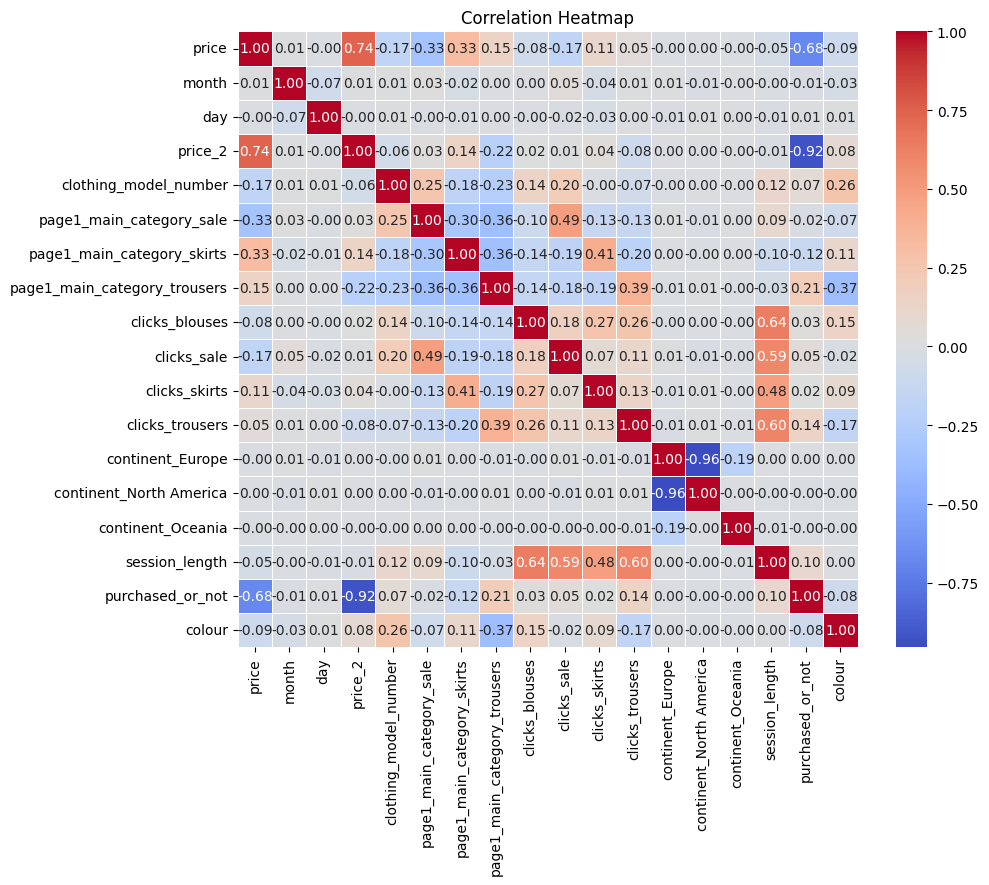

In [32]:
# Correlation matrix for numeric features
co_column = [ 'price','month','day','price_2', 'clothing_model_number', 'page1_main_category_sale', 
    'page1_main_category_skirts', 'page1_main_category_trousers',
    'clicks_blouses', 'clicks_sale', 'clicks_skirts', 'clicks_trousers',
    'continent_Europe', 'continent_North America', 'continent_Oceania','session_length','purchased_or_not','colour']
correlation_matrix = train_df[co_column].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Murali Krishna\AppData\Local\Temp\ipykernel_43648\2966905818.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='coolwarm')


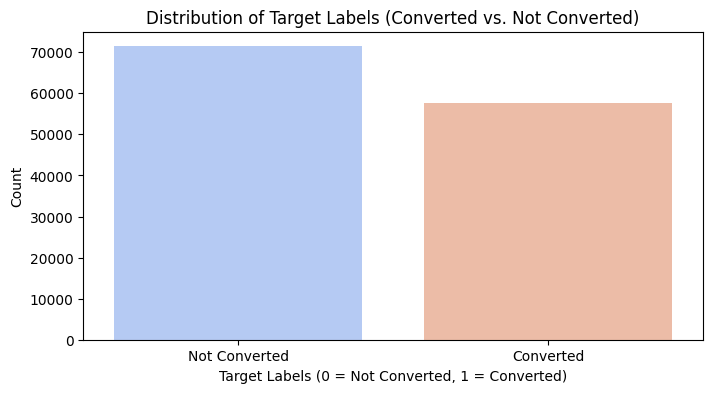

Converted (1): 44.66%
Not Converted (0): 55.34%


In [33]:
# Target variable to analyze
target_variable = 'purchased_or_not'  # Binary column indicating converted (1) vs not converted (0)

# Analyze distribution of the target variable
target_counts = train_df[target_variable].value_counts()

# Plot the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='coolwarm')
plt.title("Distribution of Target Labels (Converted vs. Not Converted)")
plt.xlabel("Target Labels (0 = Not Converted, 1 = Converted)")
plt.ylabel("Count")
plt.xticks([0, 1], labels=['Not Converted', 'Converted'])
plt.show()

# Calculate and print percentage distribution
total = target_counts.sum()
converted_percentage = (target_counts[1] / total) * 100
not_converted_percentage = (target_counts[0] / total) * 100

print(f"Converted (1): {converted_percentage:.2f}%")
print(f"Not Converted (0): {not_converted_percentage:.2f}%")


In [34]:
# Define task-specific columns
columns_for_regression = [
    'price', 'clothing_model_number', 'page1_main_category_sale', 
    'page1_main_category_skirts', 'page1_main_category_trousers',
    'colour',
    'continent_Europe', 'continent_North America', 'continent_Oceania',

]

columns_for_classification = [
    'continent_Europe', 'continent_North America','continent_Oceania',
    'session_length','clothing_model_number','page1_main_category_sale', 
    'page1_main_category_skirts', 'page1_main_category_trousers',
    'clicks_sale', 'clicks_skirts', 'clicks_trousers','purchased_or_not'
    
]

columns_for_clustering = [
    'session_length','page1_main_category_sale', 
    'page1_main_category_skirts', 'page1_main_category_trousers',
    'continent_North America', 'continent_Oceania','continent_Europe'
]

# Ensure all selected columns exist in both datasets
train_df, test_df = train_df.align(test_df, join='inner', axis=1)

# Filter datasets for each task
train_regression = train_df[columns_for_regression]
test_regression = test_df[columns_for_regression]

train_classification = train_df[columns_for_classification]
test_classification = test_df[columns_for_classification]

train_clustering = train_df[columns_for_clustering]
test_clustering = test_df[columns_for_clustering]

# Verify shapes
print("Train Regression Shape:", train_regression.shape)
print("Test Regression Shape:", test_regression.shape)
print("Train Classification Shape:", train_classification.shape)
print("Test Classification Shape:", test_classification.shape)
print("Train Clustering Shape:", train_clustering.shape)
print("Test Clustering Shape:", test_clustering.shape)


Train Regression Shape: (129061, 9)
Test Regression Shape: (32252, 9)
Train Classification Shape: (129061, 12)
Test Classification Shape: (32252, 12)
Train Clustering Shape: (129061, 7)
Test Clustering Shape: (32252, 7)


In [35]:
train_regression.head()

,price,clothing_model_number,page1_main_category_sale,page1_main_category_skirts,page1_main_category_trousers,colour,continent_Europe,continent_North America,continent_Oceania
0,48.0,20,False,False,False,13,True,False,False
1,57.0,26,False,True,False,13,True,False,False
2,48.0,13,False,False,False,9,True,False,False
3,43.0,11,False,True,False,2,True,False,False
4,57.0,31,False,True,False,9,True,False,False


In [36]:
from sklearn.model_selection import train_test_split

# Regression
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(
    train_regression.drop(columns=['price']),
    train_regression['price'],
    test_size=0.2,  # 20% for validation
    random_state=42
)

# Classification
X_train_clf, X_val_clf, y_train_clf, y_val_clf = train_test_split(
    train_classification.drop(columns=['purchased_or_not']),
    train_classification['purchased_or_not'],
    test_size=0.2,
    random_state=42
)

# Clustering (No labels, so split the features directly)
X_train_clust, X_val_clust = train_test_split(
    train_clustering,
    test_size=0.2,
    random_state=42
)



In [35]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression

# # Define pipeline
# regression_pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Standardize the data
#     ('model', LinearRegression())  # Replace with your regression model
# ])

# # Fit on training data
# regression_pipeline.fit(X_train_reg, y_train_reg)

# # Evaluate on validation data
# val_preds_reg = regression_pipeline.predict(X_val_reg)

# # Metrics
# from sklearn.metrics import mean_absolute_error, r2_score
# print("Regression Validation MAE:", mean_absolute_error(y_val_reg, val_preds_reg))
# print("Regression Validation R^2:", r2_score(y_val_reg, val_preds_reg))


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Define pipeline with RandomForest
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('model', RandomForestRegressor())  # Use RandomForestRegressor
])

# Fit on training data
regression_pipeline.fit(X_train_reg, y_train_reg)




Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [38]:
# Evaluate on training data
train_preds_reg = regression_pipeline.predict(X_train_reg)

# Evaluate on validation data
val_preds_reg = regression_pipeline.predict(X_val_reg)

# Metrics for training data
train_mae = mean_absolute_error(y_train_reg, train_preds_reg)
train_r2 = r2_score(y_train_reg, train_preds_reg)
train_mse = mean_squared_error(y_train_reg, train_preds_reg)
train_rmse = np.sqrt(train_mse)

# Metrics for validation data
val_mae = mean_absolute_error(y_val_reg, val_preds_reg)
val_r2 = r2_score(y_val_reg, val_preds_reg)
val_mse = mean_squared_error(y_val_reg, val_preds_reg)
val_rmse = np.sqrt(val_mse)

print("Training Data:")
print("MAE:", train_mae)
print("R^2:", train_r2)
print("MSE:", train_mse)
print("RMSE:", train_rmse)

print("\nValidation Data:")
print("MAE:", val_mae)
print("R^2:", val_r2)
print("MSE:", val_mse)
print("RMSE:", val_rmse)

# Test metrics
test_preds_reg = regression_pipeline.predict(test_regression.drop(columns=['price']))
print("\nRegression Test Metrics:")
print("MAE:", mean_absolute_error(test_regression['price'], test_preds_reg))
print("MSE:", mean_squared_error(test_regression['price'], test_preds_reg))
print("R^2:", r2_score(test_regression['price'], test_preds_reg))

Training Data:
MAE: 0.12214030487586176
R^2: 0.99510803703133
MSE: 0.7613494516764212
RMSE: 0.8725534090681333

Validation Data:
MAE: 0.12161657592439828
R^2: 0.9951503565483183
MSE: 0.7577958756998794
RMSE: 0.870514718830118

Regression Test Metrics:
MAE: 0.12671503645311763
MSE: 0.7993700774348523
R^2: 0.9949079393804346


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Define pipeline
classification_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('model', RandomForestClassifier(n_estimators=300,
                                    max_depth=20,
                                    max_features='sqrt',
                                    class_weight='balanced',
                                    random_state=42))  # Use RandomForestClassifier
                                    ])

# Fit on training data
classification_pipeline.fit(X_train_clf, y_train_clf)




Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        n_estimators=300, random_state=42))])

In [40]:
# Evaluate on validation data
val_preds_clf = classification_pipeline.predict(X_val_clf)

# Metrics
accuracy = accuracy_score(y_val_clf, val_preds_clf)
precision = precision_score(y_val_clf, val_preds_clf)
recall = recall_score(y_val_clf, val_preds_clf)
conf_matrix = confusion_matrix(y_val_clf, val_preds_clf)

print("Classification Validation Accuracy:", accuracy)
print("Classification Validation Precision:", precision)
print("Classification Validation Recall:", recall)
print("Classification Validation Confusion Matrix:\n", conf_matrix)

# Test metrics
test_preds_clf = classification_pipeline.predict(test_classification.drop(columns=['purchased_or_not']))
print("\nClassification Test Metrics:")
print("Accuracy:", accuracy_score(test_classification['purchased_or_not'], test_preds_clf))
print("Precision:", precision_score(test_classification['purchased_or_not'], test_preds_clf))
print("Recall:", recall_score(test_classification['purchased_or_not'], test_preds_clf))
print("Confution Matrix:",confusion_matrix(test_classification['purchased_or_not'], test_preds_clf))

Classification Validation Accuracy: 0.9355750978189284
Classification Validation Precision: 0.9171445690319268
Classification Validation Recall: 0.9390885188431201
Classification Validation Confusion Matrix:
 [[13435   968]
 [  695 10715]]

Classification Test Metrics:
Accuracy: 0.9413369713506139
Precision: 0.924230339767108
Recall: 0.9248204309656823
Confution Matrix: [[18772   950]
 [  942 11588]]


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Define pipeline
Logstic_classification_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('model', LogisticRegression(class_weight='balanced',random_state=42, max_iter=1000))  # Use LogisticRegression
])

# Fit on training data
Logstic_classification_pipeline.fit(X_train_clf, y_train_clf)




Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [42]:
# Evaluate on validation data
val_preds_clf = Logstic_classification_pipeline.predict(X_val_clf)
val_probs_clf = Logstic_classification_pipeline.predict_proba(X_val_clf)[:, 1]  # Predicted probabilities for ROC AUC

# Metrics
accuracy = accuracy_score(y_val_clf, val_preds_clf)
precision = precision_score(y_val_clf, val_preds_clf)
recall = recall_score(y_val_clf, val_preds_clf)
roc_auc = roc_auc_score(y_val_clf, val_probs_clf)
conf_matrix = confusion_matrix(y_val_clf, val_preds_clf)

# Print metrics
print("Classification Validation Accuracy:", accuracy)
print("Classification Validation Precision:", precision)
print("Classification Validation Recall:", recall)
print("Classification Validation ROC AUC:", roc_auc)
print("Classification Validation Confusion Matrix:\n", conf_matrix)

Classification Validation Accuracy: 0.6206175183047302
Classification Validation Precision: 0.5702737940026076
Classification Validation Recall: 0.5750219106047327
Classification Validation ROC AUC: 0.6558489098975935
Classification Validation Confusion Matrix:
 [[9459 4944]
 [4849 6561]]


In [43]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Define a pipeline with StandardScaler and KMeans
clustering_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('kmeans', KMeans(n_clusters = 10 , random_state=42, init='k-means++'))  # Initialize KMeans
])

# Fit the pipeline on the training data
clustering_pipeline.fit(X_train_clust)


Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=10, random_state=42))])

In [44]:
# Predict cluster labels for training, validation, and test sets
train_labels = clustering_pipeline.predict(X_train_clust)
val_labels = clustering_pipeline.predict(X_val_clust)
test_labels = clustering_pipeline.predict(test_clustering)

# Add cluster labels to separate copies of the data for summary and analysis
X_train_clust_with_labels = X_train_clust.copy()
X_train_clust_with_labels['cluster'] = train_labels
X_val_clust_with_labels = X_val_clust.copy()
X_val_clust_with_labels['cluster'] = val_labels
test_clustering_with_labels = test_clustering.copy()
test_clustering_with_labels['cluster'] = test_labels

# Calculate mean values for each cluster
cluster_summary = X_train_clust_with_labels.groupby('cluster').mean()
print("Cluster Centers (Mean Values):\n", cluster_summary)

# Calculate silhouette scores using the original feature set (exclude the 'cluster' column)
X_train_clust_scaled = clustering_pipeline.named_steps['scaler'].transform(X_train_clust)
X_val_clust_scaled = clustering_pipeline.named_steps['scaler'].transform(X_val_clust)
X_test_clust_scaled = clustering_pipeline.named_steps['scaler'].transform(test_clustering)

silhouette_avg_train = silhouette_score(X_train_clust_scaled, train_labels)
silhouette_avg_val = silhouette_score(X_val_clust_scaled, val_labels)
silhouette_avg_test = silhouette_score(X_test_clust_scaled, test_labels)

# Print results
print(f"Silhouette Score for Training Data: {silhouette_avg_train}")
print(f"Silhouette Score for Validation Data: {silhouette_avg_val}")
print(f"Silhouette Score for Test Data: {silhouette_avg_test}")


Cluster Centers (Mean Values):
          session_length  page1_main_category_sale  page1_main_category_skirts  \
cluster                                                                         
0             37.112441                  1.000000                    0.000000   
1             10.379698                  0.000000                    0.000000   
2              9.181304                  0.000000                    0.000000   
3             15.750000                  0.104839                    0.209677   
4              8.837554                  0.000000                    1.000000   
5              4.000000                  0.500000                    0.250000   
6             10.672575                  1.000000                    0.000000   
7             35.800812                  0.000000                    0.000000   
8             35.721054                  0.000000                    1.000000   
9             38.369602                  0.000000                    0.000000

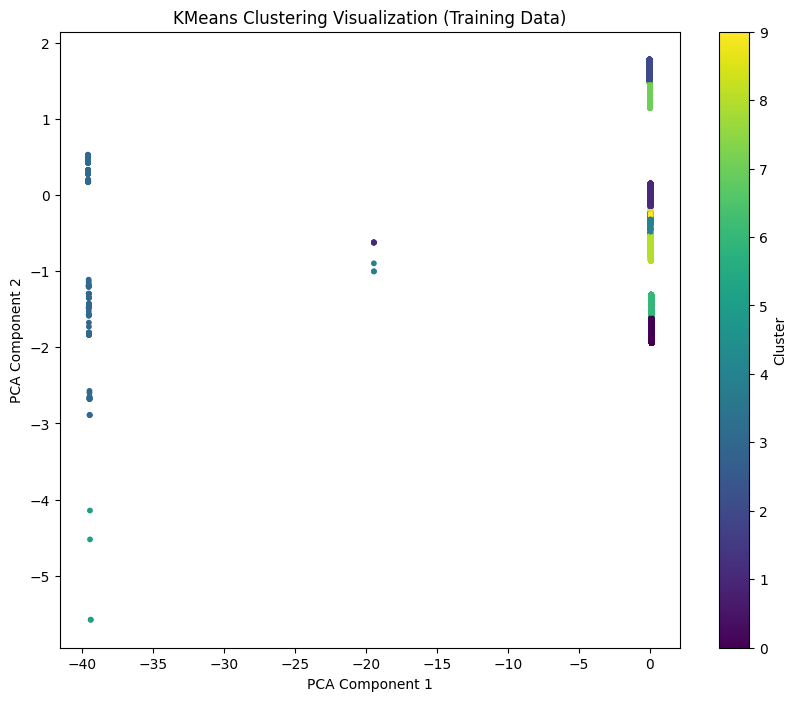

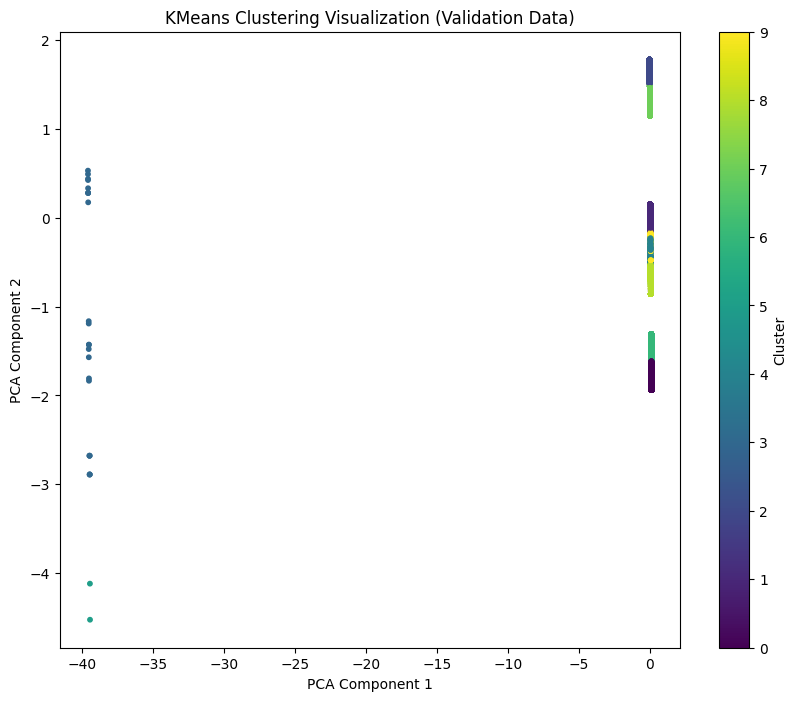

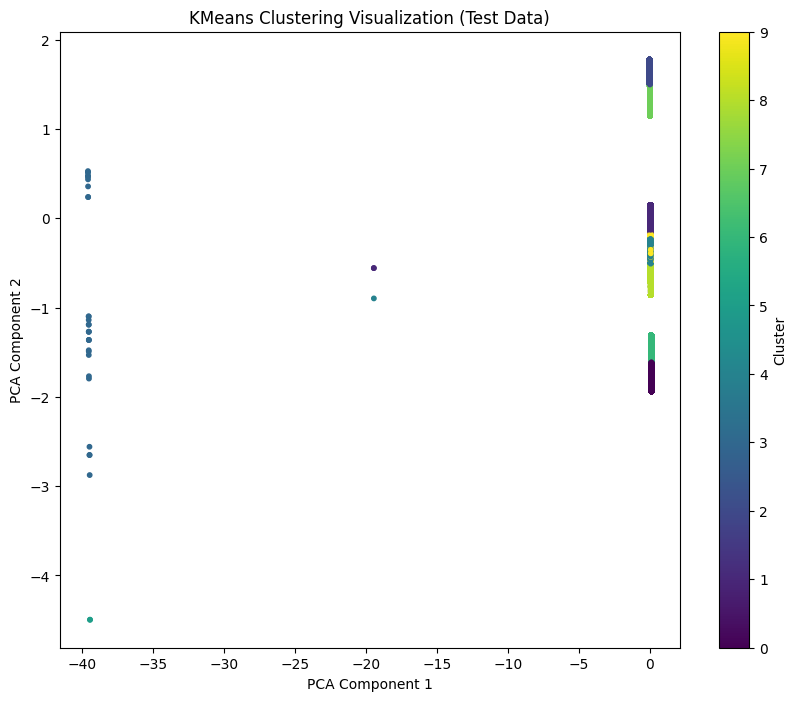

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality of the scaled training data using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_pca = pca.fit_transform(X_train_clust_scaled)

# Visualize clusters on the training data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_labels, cmap='viridis', s=10)
plt.title("KMeans Clustering Visualization (Training Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')
plt.show()

# Scale the validation and test data without modifying the original structure
X_val_clust_scaled = clustering_pipeline.named_steps['scaler'].transform(X_val_clust)
X_test_clust_scaled = clustering_pipeline.named_steps['scaler'].transform(test_clustering)

# Apply PCA to scaled validation and test data
X_val_pca = pca.transform(X_val_clust_scaled)
X_test_pca = pca.transform(X_test_clust_scaled)

# Visualize clusters on validation data
plt.figure(figsize=(10, 8))
scatter_val = plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=val_labels, cmap='viridis', s=10)
plt.title("KMeans Clustering Visualization (Validation Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter_val, label='Cluster')
plt.show()

# Visualize clusters on test data
plt.figure(figsize=(10, 8))
scatter_test = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_labels, cmap='viridis', s=10)
plt.title("KMeans Clustering Visualization (Test Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter_test, label='Cluster')
plt.show()


In [46]:
import mlflow
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error, 
    accuracy_score, precision_score, recall_score, 
    confusion_matrix, roc_auc_score, silhouette_score
)

# Set MLflow tracking URI and experiment
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Customer Conversion Analysis Unified Experiment for All Models")


def log_model_and_metrics(model, model_name, task_type, X_train, y_train=None, 
                          X_val=None, y_val=None, test_data=None, params=None):
    """
    Logs the model, metrics, and artifacts to MLflow.
    
    Parameters:
        - model: Machine learning model or pipeline.
        - model_name: Name of the model.
        - task_type: "regression", "classification", or "clustering".
        - X_train, y_train: Training data and labels.
        - X_val, y_val: Validation data and labels (optional for clustering).
        - test_data: Test data (dict with 'features' and 'labels' keys).
        - params: Hyperparameters to log.
    """
    with mlflow.start_run(run_name=model_name) as run:
        # Fit model
        model.fit(X_train, y_train if y_train is not None else None)

        # Log parameters
        if params:
            mlflow.log_params(params)

        if task_type == "regression":
            # Predict and calculate metrics
            val_preds = model.predict(X_val)
            test_preds = model.predict(test_data['features'])

            metrics = {
                "val_mae": mean_absolute_error(y_val, val_preds),
                "val_r2": r2_score(y_val, val_preds),
                "val_rmse": np.sqrt(mean_squared_error(y_val, val_preds)),
                "test_mae": mean_absolute_error(test_data['labels'], test_preds),
                "test_r2": r2_score(test_data['labels'], test_preds),
                "test_rmse": np.sqrt(mean_squared_error(test_data['labels'], test_preds)),
            }
            mlflow.log_metrics(metrics)

        elif task_type == "classification":
            # Predict and calculate metrics
            val_preds = model.predict(X_val)
            val_probs = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

            test_preds = model.predict(test_data['features'])
            test_probs = model.predict_proba(test_data['features'])[:, 1] if hasattr(model, "predict_proba") else None

            metrics = {
                "val_accuracy": accuracy_score(y_val, val_preds),
                "val_precision": precision_score(y_val, val_preds),
                "val_recall": recall_score(y_val, val_preds),
                "val_roc_auc": roc_auc_score(y_val, val_probs) if val_probs is not None else None,
                "test_accuracy": accuracy_score(test_data['labels'], test_preds),
                "test_precision": precision_score(test_data['labels'], test_preds),
                "test_recall": recall_score(test_data['labels'], test_preds),
                "test_roc_auc": roc_auc_score(test_data['labels'], test_probs) if test_probs is not None else None,
            }
            mlflow.log_metrics({k: v for k, v in metrics.items() if v is not None})

        elif task_type == "clustering":
            # Handle 'cluster' column if it exists in test data
            if test_data and "features" in test_data:
                if "cluster" in test_data["features"].columns:
                    test_data["features"] = test_data["features"].drop(columns=["cluster"])

            # Get scaled data directly
            X_train_scaled = model.named_steps['scaler'].transform(X_train)
            X_val_scaled = model.named_steps['scaler'].transform(X_val)
            X_test_scaled = model.named_steps['scaler'].transform(test_data['features'])

            # Make predictions
            train_labels = model.predict(X_train)
            val_labels = model.predict(X_val)
            test_labels = model.predict(test_data['features'])

            # Calculate metrics on scaled data
            metrics = {
                "train_silhouette": silhouette_score(X_train_scaled, train_labels),
                "val_silhouette": silhouette_score(X_val_scaled, val_labels),
                "test_silhouette": silhouette_score(X_test_scaled, test_labels),
            }
            mlflow.log_metrics(metrics)

            # Visualization
            pca = PCA(n_components=2)
            X_train_pca = pca.fit_transform(X_train_scaled)
            plt.figure(figsize=(8, 6))
            plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_labels, cmap='viridis', s=10)
            plt.title(f"Clustering Visualization: {model_name}")
            plt.xlabel("PCA Component 1")
            plt.ylabel("PCA Component 2")
            plt.colorbar(label='Cluster')
            plt.savefig("cluster_visualization.png")
            plt.close()
            mlflow.log_artifact("cluster_visualization.png")

            

        # Log the model
        mlflow.sklearn.log_model(model, artifact_path="model")
        print(f"Model {model_name} logged successfully! Run ID: {run.info.run_id}")
        return run.info.run_id




In [47]:
def register_model(run_id, model_name):
    """
    Registers the model with the MLflow model registry.
    """
    model_uri = f"runs:/{run_id}/model"
    registered_model = mlflow.register_model(model_uri=model_uri, name=model_name)
    print(f"Model {model_name} registered successfully! Version: {registered_model.version}")



In [48]:
# Log Regression Model
run_id_1 = log_model_and_metrics(
    regression_pipeline, "Random Forest Regressor", "regression",
    X_train_reg, y_train_reg, X_val_reg, y_val_reg,
    test_data={'features': test_regression.drop(columns=['price']), 'labels': test_regression['price']},
    params={"n_estimators": 100, "max_depth": None}
)


# Log Classification Model

run_id_2 = log_model_and_metrics(
    classification_pipeline, "Random Forest Classifier", "classification",
    X_train_clf, y_train_clf, X_val_clf, y_val_clf,
    test_data={'features': test_classification.drop(columns=['purchased_or_not']), 'labels': test_classification['purchased_or_not']},
    params = {
    "n_estimators": 300,
    "max_depth": 20,
    "max_features": "sqrt",
    "class_weight": "balanced",
    "random_state": 42
}

)

# Log Clustering Model
run_id_3 = log_model_and_metrics(
    clustering_pipeline, "KMeans Clustering", "clustering",
    X_train_clust, X_val=X_val_clust,
    test_data={'features': test_clustering},
    params={"n_clusters": 12 }
)



2025/01/24 09:57:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Random Forest Regressor logged successfully! Run ID: 5be5e60ed536491eb6c370f7e91b09d0
🏃 View run Random Forest Regressor at: http://127.0.0.1:5000/#/experiments/972280885089829677/runs/5be5e60ed536491eb6c370f7e91b09d0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/972280885089829677


2025/01/24 09:57:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Random Forest Classifier logged successfully! Run ID: 038bcb0e6b6f4a57b94419bac188ea8e
🏃 View run Random Forest Classifier at: http://127.0.0.1:5000/#/experiments/972280885089829677/runs/038bcb0e6b6f4a57b94419bac188ea8e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/972280885089829677


2025/01/24 10:00:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model KMeans Clustering logged successfully! Run ID: a9336d7117344d09a7858d901cb8acd6
🏃 View run KMeans Clustering at: http://127.0.0.1:5000/#/experiments/972280885089829677/runs/a9336d7117344d09a7858d901cb8acd6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/972280885089829677


In [49]:
# Registering all the models
register_model(run_id_1, "Random Forest Regressor")

Registered model 'Random Forest Regressor' already exists. Creating a new version of this model...
2025/01/24 10:00:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Regressor, version 10


Model Random Forest Regressor registered successfully! Version: 10


Created version '10' of model 'Random Forest Regressor'.


In [50]:
register_model(run_id_2, "Random Forest Classifier")

Registered model 'Random Forest Classifier' already exists. Creating a new version of this model...
2025/01/24 10:00:42 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest Classifier, version 10


Model Random Forest Classifier registered successfully! Version: 10


Created version '10' of model 'Random Forest Classifier'.


In [51]:
register_model(run_id_3, "KMeans Clustering")

Registered model 'KMeans Clustering' already exists. Creating a new version of this model...
2025/01/24 10:00:44 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: KMeans Clustering, version 9


Model KMeans Clustering registered successfully! Version: 9


Created version '9' of model 'KMeans Clustering'.


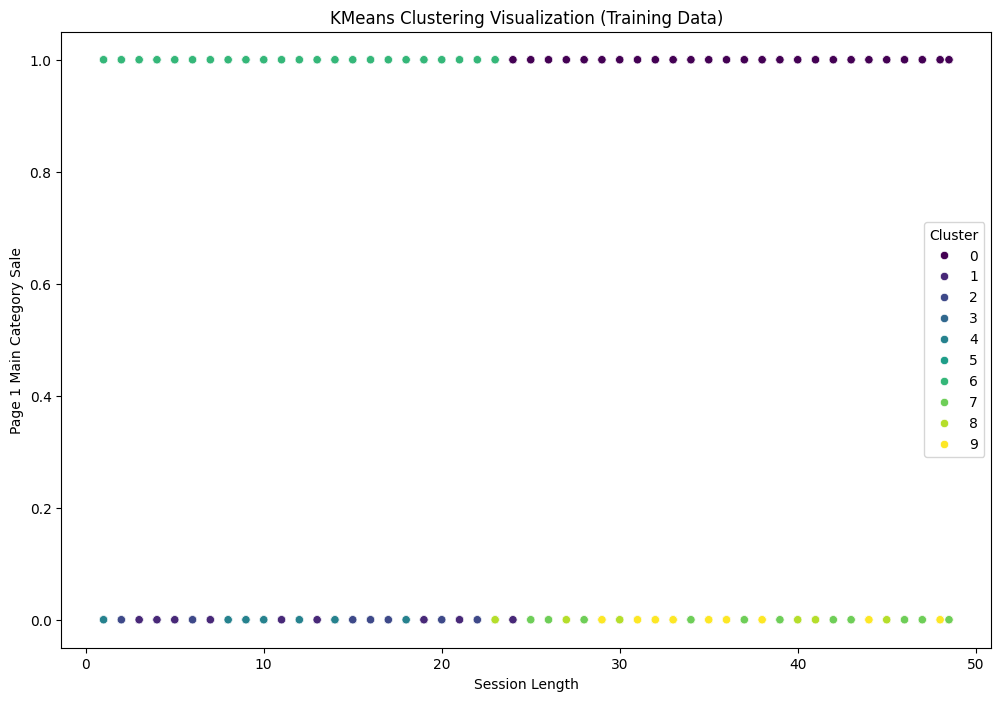

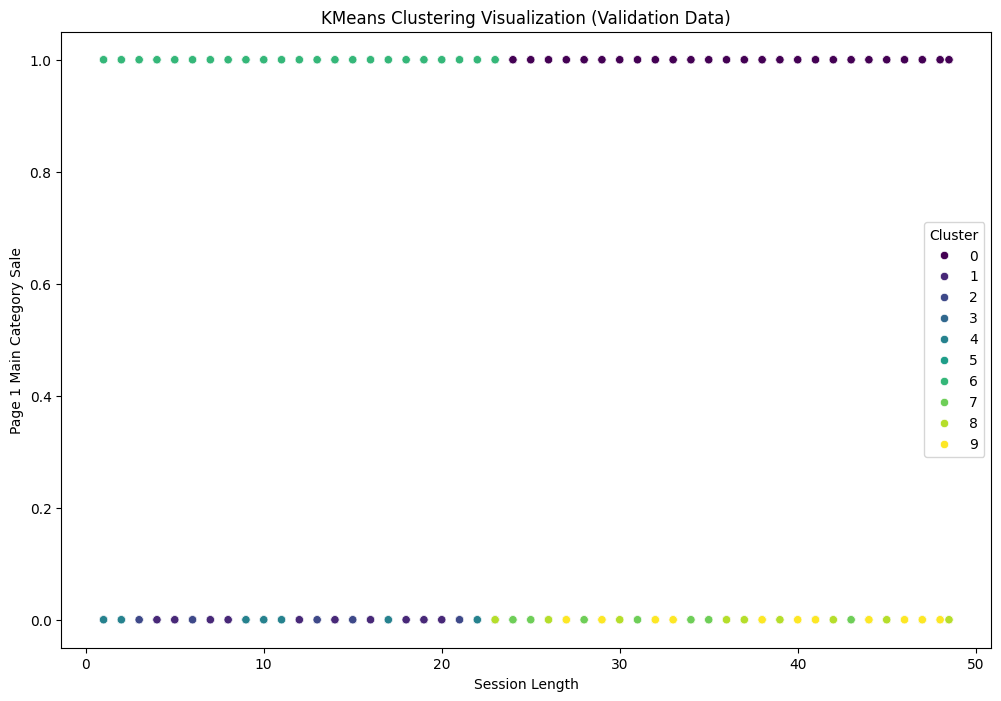

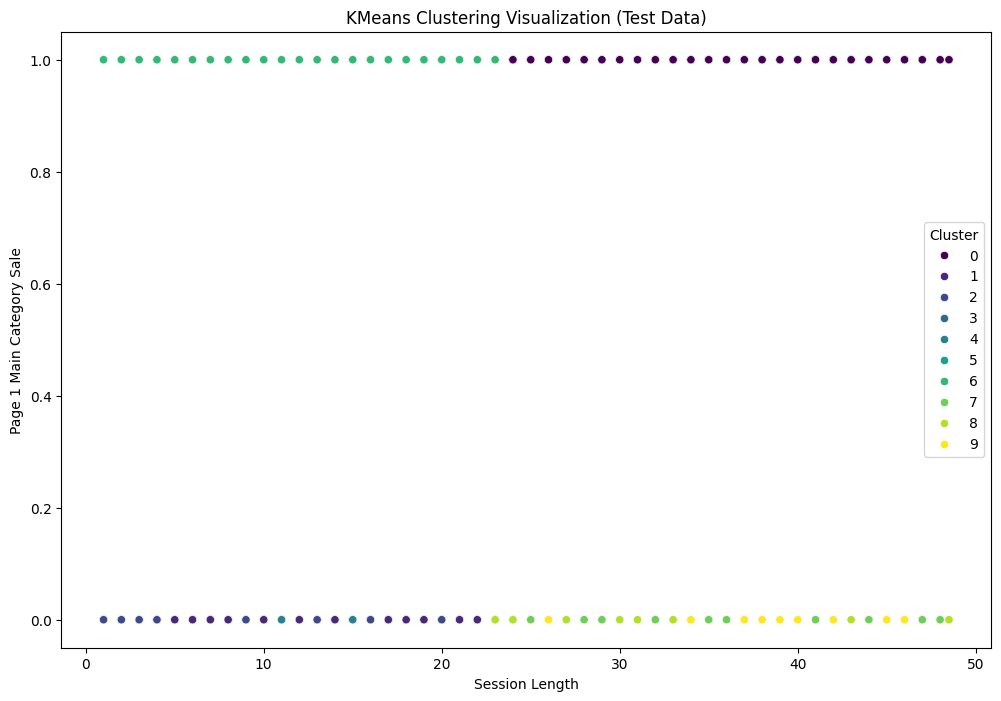

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize KMeans clusters on the training data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_train_clust['session_length'],
    y=X_train_clust['page1_main_category_sale'],
    hue=train_labels,
    palette='viridis',
    legend='full'
)
plt.title("KMeans Clustering Visualization (Training Data)")
plt.xlabel("Session Length")
plt.ylabel("Page 1 Main Category Sale")
plt.legend(title='Cluster')
plt.show()

# Visualize KMeans clusters on the validation data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_val_clust['session_length'],
    y=X_val_clust['page1_main_category_sale'],
    hue=val_labels,
    palette='viridis',
    legend='full'
)
plt.title("KMeans Clustering Visualization (Validation Data)")
plt.xlabel("Session Length")
plt.ylabel("Page 1 Main Category Sale")
plt.legend(title='Cluster')
plt.show()

# Visualize KMeans clusters on the test data
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=test_clustering['session_length'],
    y=test_clustering['page1_main_category_sale'],
    hue=test_labels,
    palette='viridis',
    legend='full'
)
plt.title("KMeans Clustering Visualization (Test Data)")
plt.xlabel("Session Length")
plt.ylabel("Page 1 Main Category Sale")
plt.legend(title='Cluster')
plt.show()


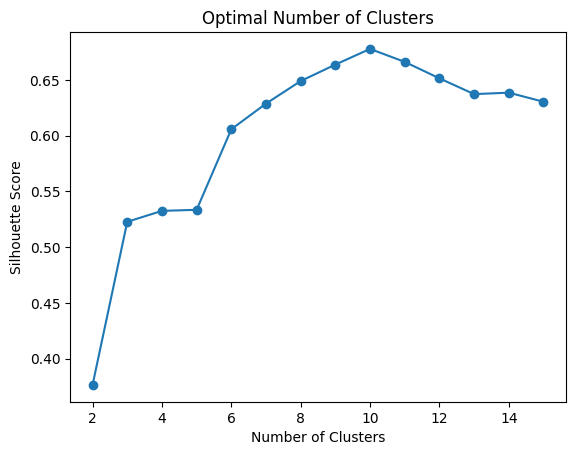

In [57]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_clust_scaled)
    score = silhouette_score(X_train_clust_scaled, labels)
    scores.append(score)

plt.plot(range(2, 16), scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal Number of Clusters')
plt.show()


In [64]:
! streamlit run app.py

^C
